# Building a Linear Regression Model for Housing Price Prediction

**Sicong E**

## Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

When it comes to predicting housing prices, many factors can come into play. Factors such as overall quality that rates the overall material and finish of the house, as well as gross living area, are admittedly important factors contributing to home value, but they are not the only couple. The goal of this project is to build a linear regression model using the Ames Housing Dataset and apply data analysis techniques such as exploratory data analysis, data cleaning, and feature selection targeting multiple independent variables that are moderately and highly correlated with the dependent variable, to improve prediction accuracy that can help both realtors and prospective homeowners accurately price a house based on its available features.

[Back to top](#Index)


## 1. Introduction

The goal of this project is to build a model using linear regression algorithm to predict house prices through Sklearn, the most useful and powerful machine learning package in Python. The training data consists of the sales price and location of the properties and the various features included with them. From this dataset with 2,930 observations and 82 variables, 100 observations with all variables was selected as the training data, while another 100 was chosen as testing data used to check the accuracy of the model by comparing the predicted values and the actual values.

The steps of work are contrived as follows: Section 2.1 briefs data familiarization before data analysis techniques are initiated. Section 2.2 explains the data exploration process. Analyzing the distribution of the dependent variable *SalePrice* leads to the conclusion that the correct next step is to log transform the dependent variable value. Section 2.3 explains how the data for modeling is prepared. It follows steps of cleaning and imputation. Section 2.4 describes using correlations to help make educated guesses about how to proceed with the analysis, showing a data reshaping process based on features within a target range of correlation strengths. Section 3.1 covers the algorithm used in this project. Section 3.2 presents the steps to implement the algorithm using Python and SKlearn tools to build the model. Several analysis approaches to improve the accuracy of the model are explained. Section 3.3 exhibits the results obtained. Section 3.4 elaborates the process of testing the model against test data to confirm its accuracy on new data. Finally, the conclusion is extrapolated in the last section.

[Back to top](#Index)

## 2. The Data

The data source used for modeling in this project is Ames Housing Dataset, which is a well-known dataset in the field of machine learning and data analysis. It contains various features and attributes of residential homes in Ames, Iowa, USA. The dataset is often used for regression tasks, particularly for predicting housing prices.

[Back to top](#Index)

### 2.1 Import the Data

Data collection is one of the first steps in starting to build any model. After importing the training dataset using *pandas.read_csv*, preliminary information about the data can be retreived. The dataset consists of 100 rows as data points, each one representing the sale of a property, and 82 columns as variables, each describing a feature of that property. Null values can be easily detected from the first 5 rows.

In [1]:
# import the training data

import numpy as np
import pandas as pd

train = pd.read_csv('houseSmallData.csv') # get the training dataset
print(train.shape)
train.head()

(100, 82)


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


[Back to top](#Index)

### 2.2 Data Exploration

By using *pandas.Series.describe* and *matplotlib.pyplot.hist* to understand the basic statistics and the distribution pattern of the dependent variable *SalePrice*, the data is found fairly right skewed and unevenly distributed with a few outliers with higher sale prices. Since it looks much like a log-normal distribution, the log-transformed data using *numpy.log* is tested for comparison, and it turns much closer to a normal distribution. Unbiased skews of the two distributions can be calculated using *pandas.Series.skew*. The closer the returned skewness is to 0, the more normal the distribution is. It turns out that the log-transformed distribution of sales prices has a skewness of -0.10, while the original distribution has a skewness of 1.18. This transformation does improve the regression models, as can be seen later in the improvement of the model's performance against test data. The sale price outliers seen in the original data are less drastic after the log transformation and do not need to be removed for the analysis.

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64


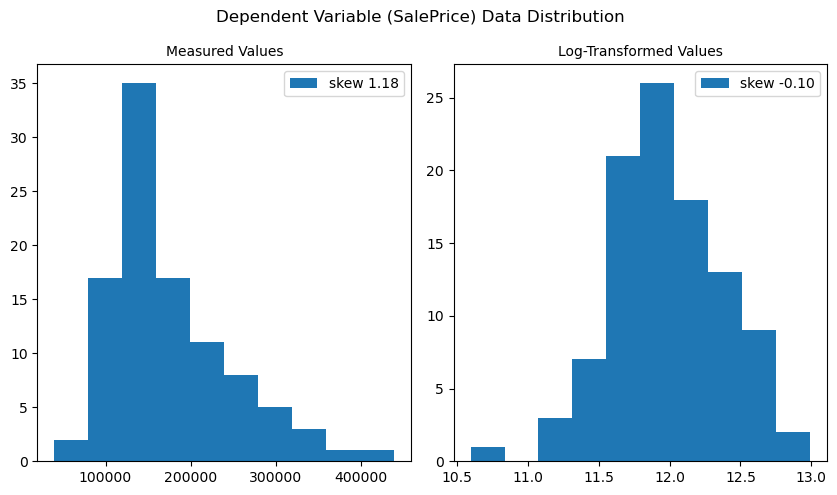

In [38]:
# analyze distribution of dependent variable using Series.describe(), Series.skew() and plt.hist()

import matplotlib.pyplot as plt

Y_distrib = train['SalePrice']
print(Y_distrib.describe())
fig, ax = plt.subplots(1,2)

# the original data is fairly skewed and unevenly distributed, much like a log-normal distribution
ax[0].hist(Y_distrib, label=f'skew {Y_distrib.skew():.2f}')
ax[0].set_title('Measured Values', size=10)
ax[0].legend()

# the log-transformed data looks close to a normal distribution
ax[1].hist(np.log(Y_distrib), label=f'skew {np.log(Y_distrib).skew():.2f}')
ax[1].set_title('Log-Transformed Values', size=10)
ax[1].legend()
fig.suptitle('Dependent Variable (SalePrice) Data Distribution')
fig.set_figwidth(8.5)
fig.tight_layout()
plt.show()

# conclude that a proper next step is to transform the data by taking the logarithm of the SalePrice values
# if the logarithm of the sale prices can be predicted, the actual sale prices can also be predicted by such transformation
Y_target = np.log(Y_distrib)

[Back to top](#Index)

### 2.3 Data Preparation

As there are any missing values in the data. ? If yes, include a description of the steps you followed to clean the data.

In this step, columns with missing values are checked for to determine which features may not add enough value to the analysis, or if any missing values will need to be interpolated. After sorting the features by number of null values and cross-checking them with features that have moderate and higher correlation with the dependent features, it was found that there was no overlap, so it was confirmed that these features with null values were allowed to be discarded in following cleaning process.

Next, through a series of data cleaning actions, *DataFrame.select_dtypes(include=np.number)* for droping non-numeric columns, *DataFrame.interpolate* for filling NaN values using an interpolation method, *DataFrame.dropna* for droping columns with uninterpolatable null values, the dataset is more reasonable, accurate, and better organized, and is ready for the correlation analysis in the next step. The data has been reshaped to 39 columns after the cleaning process.

In [3]:
# detect missing values by sorting independent variables by number of nulls

nulls = train.isna().sum().sort_values(ascending=False)
nulls = nulls[nulls.values != 0]
nulls

PoolQC          100
Alley            94
MiscFeature      91
Fence            77
FireplaceQu      54
LotFrontage      14
GarageType        6
GarageYrBlt       6
GarageFinish      6
GarageQual        6
GarageCond        6
BsmtFinType1      3
BsmtQual          3
BsmtCond          3
BsmtExposure      3
BsmtFinType2      3
dtype: int64

In [4]:
# get the subset including columns of numeric data only, fill NaN values, and drop columns with uninterpolatable NaNs

data = train.select_dtypes(include=np.number).interpolate().dropna(axis=1)
print(sum(data.isna().sum() != 0)) # verify there is no missing data
print(data.shape) # get information about the number of remaining columns after data cleaning and repairing

0
(100, 39)


[Back to top](#Index)

### 2.4 Correlation

Pearson Correlation Coefficient (r) ∈[-1,1] is the most common way of measuring a linear correlation in a value between –1 and 1 that measures the strength and direction of the relationship between two variables (can be thought of as normalized covariance). It is an important factor applied to aid in the analysis in this project. The strength of correlation is classified according to the absolute value of the coefficient: *0~0.2* is negligible, *0.2~0.4* is weak, *0.4~0.6* is moderate, *0.6~0.8* is marked, and *0.8~1.0* is high. *pandas.corr* can be used to compute pairwise correlation of columns. 

I specified the acceptable range of coefficients to be no less than 0.4, that is, only independent features with moderate and higher correlation strength are to be retained for subsequent linear regression model analysis. After implementing it by code, the selected 15 features have surfaced. They are *OverallQual*, *GrLivArea*, *GarageArea*, *GarageCars*, *YearBuilt*, *TotalBsmtSF*, *GarageYrBlt*, *FullBath*, *MasVnrArea*, *TotRmsAbvGrd*, *1stFlrSF*, *YearRemodAdd*, *LotArea*, *Fireplaces*, and *WoodDeckSF*. The correlation metric used to narrow down the features to be selected can be better understood in the bar plot below.

In [9]:
# calculate correlation factor

corr = data.corr() # return a DataFrame listing corrilation between any 2 columns
print(corr.shape) # understand the returned DataFrame is square in shape (col_num, col_num)

# strength of correlation is classified as, negligible 0~0.2, weak 0.2~0.4, moderate 0.4~0.6, marked 0.6~0.8, high 0.8~1.0
# limit variables with moderate strength of correlation and higher (r >= 0.4)
columns = corr['SalePrice'][corr.SalePrice.abs() >= 0.4].sort_values(ascending=False)
print(columns) # get information about columns that match criteria in a Series
cols = columns.index # get column labels in an Index
print(cols) # result in totally 15 columns to be considered, excluding SalePrice, the dependent variable column

(39, 39)
SalePrice       1.000000
OverallQual     0.855061
GrLivArea       0.735129
GarageArea      0.688249
GarageCars      0.663441
YearBuilt       0.658636
TotalBsmtSF     0.616297
GarageYrBlt     0.589361
FullBath        0.579505
MasVnrArea      0.571836
TotRmsAbvGrd    0.553603
1stFlrSF        0.550912
YearRemodAdd    0.548330
LotArea         0.497124
Fireplaces      0.487907
WoodDeckSF      0.451241
Name: SalePrice, dtype: float64
Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea',
       'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd', 'LotArea', 'Fireplaces',
       'WoodDeckSF'],
      dtype='object')


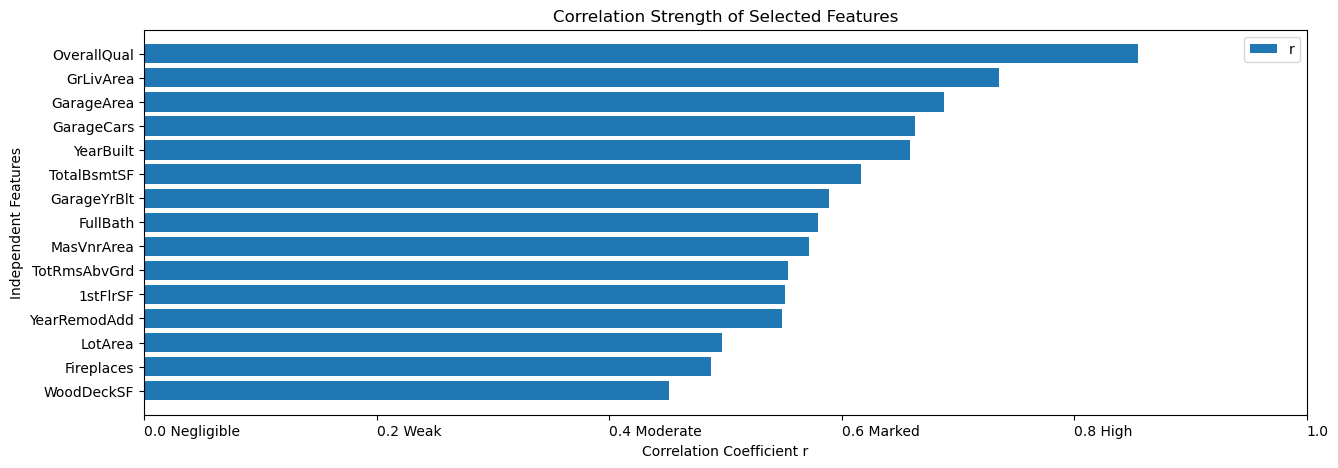

In [26]:
plt.figure(figsize=(15,5))
plt.barh(cols[1:], columns[1:].values, label='r')
plt.gca().invert_yaxis()
plt.axis([0.0, 1.0, 15, -1])
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],['0.0 Negligible','0.2 Weak','0.4 Moderate','0.6 Marked', '0.8 High','1.0'], ha='left')
plt.xlabel('Correlation Coefficient r')
plt.ylabel('Independent Features')
plt.title('Correlation Strength of Selected Features')
plt.legend()
plt.show()

[Back to top](#Index)

## 3. Project Description

In this section, the steps to implement the algorithm using Python and SKlearn tools to build the model are presented. Several analysis approaches to improve the accuracy of the model are explained. They are, detecting how R-squared score varies as the number of variables for modeling increases, testing how the sample weight parameter affects the score, as well as comparing the model quality using log-transformed dependent variable data against using original dependent variable data through visual inspections of the plots. The results obtained are then exhibited to assist in explaining the findings derived from the data analysis.

[Back to top](#Index)

### 3.1 Linear Regression

The algorithm selected for data analysis in this project is multiple linear regression, where the value for the dependent variable is calculated using multiple independent variables. The value of variable which is to be predicted depends on its strength of relationship with the other independent variables. This factor is correlation that has been covered above. Linear regression is a machine learning algorithm that is used to predict values within a continuous range rather than classifying them into categories.

*Simple linear regression* is the most basic form of linear regression. Its mathematical formulation is based on the traditional equation below, where x is the independent variable, y is the dependent variable, m is the slope or the weight, b is the intercept or the bias.
$$ y = mx + b $$
*Multiple Linear Regression* can be viewed as a natural extension of simple linear regression. The main difference is that now multiple sets of data are used to make the prediction. The equation for multiple linear regression becomes:
$$ y = m_{1}x_{1} + m_{2}x_{2} + ... + m_{n}x_{n} + b $$

Linear regression modeling can be realized in Python with tools provided in SKlearn library, where linear regression is defined as the process of determining the straight line that best fits a set of dispersed data points and the line can then be projected to forecast fresh data points. Due to its simplicity and essential features, linear regression is a fundamental Machine Learning method. *sklearn.linear_model.LinearRegression* class is used to instantiate Linear Regression model. The key methods of this class used in this project include *LinearRegression.fit(X, Y, sample_weight=None)* that fits linear model and returns fitted estimator, *LinearRegression.predict* that predicts class labels for samples in X using the linear model, and *LinearRegression.score(X, Y, sample_weight=None)* that returns the coefficient of determination of the prediction, or the mean accuracy score [0,1] of the model.

[Back to top](#Index)

### 3.2 Analysis 

The improvement in model quality by the 3 approaches implemented in the analysis process are measured by *R-squared* value generated after fitting and predicting steps. *R-squared* or *coefficient of determination* of the prediction is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable in a regression model; In other words, r-squared shows how well the data fit the regression model (the goodness of fit). The value range is [0,1]. The higher the value, the better the prediction accuracy of the model.

The first analysis is to compare the results of 3 different sets of independent variables and use the best one. They use the top 5, 10, and 15 most relevant variables in order for testing.

The second analysis is to test how enabling *LinearRegression.fit*'s *sample_weight* parameter affects the result. This paramenter is used to estimate sample weights by class for unbalanced datasets.

During the data exploration phase, it is concluded that taking the log of the dependent variable *SalePrice* can help further improve the models' performance. Therefore, the final analysis is to test the result from visual inspections of the linear regression correlation plots.

In [27]:
# RESULT IMPROVEMENT ANALYSIS: compare the results of 3 different sets of independent variables and use the best one

# assign 3 selected sets of columns to X-variables and SalePrice column to Y-variable
Y = data['SalePrice']
X1 = data[cols[1:6]]  # include highest  5 correlated variables
X2 = data[cols[1:11]] # include highest 10 correlated variables
X3 = data[cols[1:]]   # include highest 15 correlated variables

# build linear regression model using sklearn library
from sklearn import linear_model

for item in list([X1,X2,X3]):
    score_item = linear_model.LinearRegression().fit(item,Y).score(item,Y)
    print(f'P^2 = {score_item}')
# highest  5 correlated variables R^2 = 0.83
# highest 10 correlated variables R^2 = 0.85
# highest 15 correlated variables R^2 = 0.88
# conclude that the more variables are included the better prediction accuracy the model is

X = X3 # confirm to use all 15 variables to continue

P^2 = 0.8309859964337732
P^2 = 0.8517354506353321
P^2 = 0.8824028808099044


In [28]:
# RESULT IMPROVEMENT ANALYSIS 2: test how enabling LinearRegression.fit()'s sample_weight parameter affects the result

from sklearn.utils.class_weight import compute_sample_weight

weight = compute_sample_weight(class_weight='balanced',y=Y)
score_sw = linear_model.LinearRegression().fit(X,Y).score(X,Y)
score_sw
# conclude that enabling sample_weight argument barely improves the score in this case

0.8824028808099044

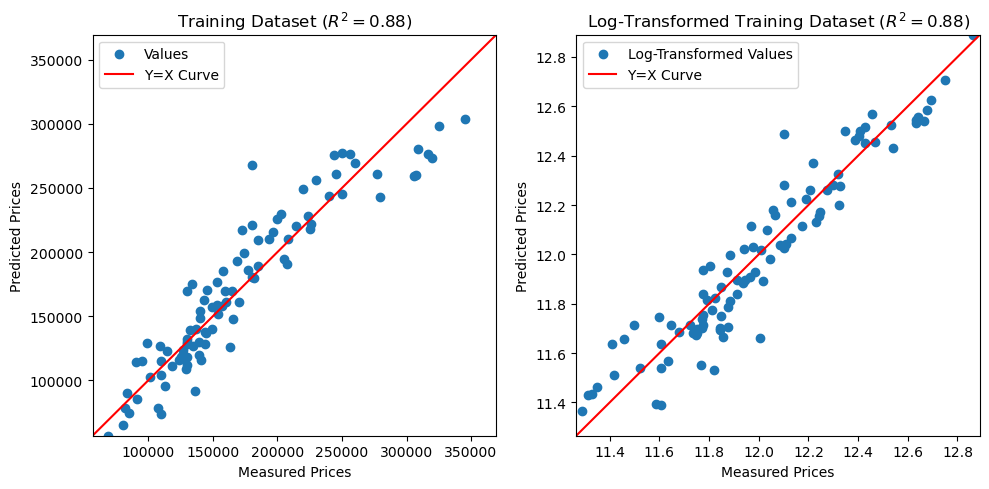

In [29]:
# RESULT IMPROVEMENT ANALYSIS 3: visual inspection of log-transformed data

# visual inspection of the model fit by original Y-variable data reveals some non-linearity in the data
model_untrans = linear_model.LinearRegression().fit(X,Y)
Y_pred_untrans = model_untrans.predict(X)
R2_untrans = model_untrans.score(X,Y)

# the model fit by log-transformation Y-variable data
model = linear_model.LinearRegression().fit(X,np.log(Y)) # fit the model with log-transformed Y-variable data
Y_pred = model.predict(X)
R2 = model.score(X,np.log(Y)) # R-squared score remains unchanged from using log-transformed Y-variable data

# plot predictions by the above 2 models to compare

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)

# plot the model fit by original Y-variable data
ax[0].scatter(Y, Y_pred_untrans, label='Values')
ax[0].plot([Y.min(), Y.max()], [Y.min(), Y.max()], label='Y=X Curve', c='red', lw=1.5)
ax[0].axis([Y_pred_untrans.min(), Y_pred_untrans.max(), Y_pred_untrans.min(), Y_pred_untrans.max()])
ax[0].set_title(f'Training Dataset ($R^2 = {R2_untrans:.2f})$')
ax[0].set_xlabel('Measured Prices')
ax[0].set_ylabel('Predicted Prices')
ax[0].legend()

# plot the model fit by log-transformation Y-variable data
ax[1].scatter(np.log(Y), Y_pred, label='Log-Transformed Values')
ax[1].plot([np.log(Y).min(), np.log(Y).max()], [np.log(Y).min(), np.log(Y).max()], label='Y=X Curve', c='red', lw=1.5)
ax[1].axis([Y_pred.min(), Y_pred.max(), Y_pred.min(), Y_pred.max()])
ax[1].set_title(f'Log-Transformed Training Dataset ($R^2 = {R2:.2f})$')
ax[1].set_xlabel('Measured Prices')
ax[1].set_ylabel('Predicted Prices')
ax[1].legend()

fig.set_figwidth(10)
fig.tight_layout()
plt.show()
# conclude the model fit by log-transformation Y-variable data does present better linearity from visual inspection
# confirm to use the model fit from log-transformation Y-variable data to continue

[Back to top](#Index)

### 3.3 Results

For the first analysis, the 3 different sets using the highest 5, 10, and 15 correlated variables in order gave R-squares of 0.83, 0.85, and 0.88 in order. It can be concluded that the more good correlated features included, the higher the prediction accuracy of the model. Therefore, all 15 variables were continued to be used in the following analysis.

As for the second analysis, it is concluded from the unchanged R-square that enabling the *sample_weight* argument barely improves the score in this case.

Regarding the final analysis, it could be seen some non-linearity in the data from the plot of the model fit by original *SalePrice* data, although R-squared remained unchanged from using log-transformed *SalePrice* data. In contrast, the model fit by *SalePrice* data after log transformation did present better linearity from visual inspection. The prediction errors in value also presented a normal distribution as shown below. It is then confirmed to use that is fit by log-transformed data as the model to be verified against test data next. If the logarithm of the sale prices can be predicted, the actual sale prices can also be predicted by such transformation.

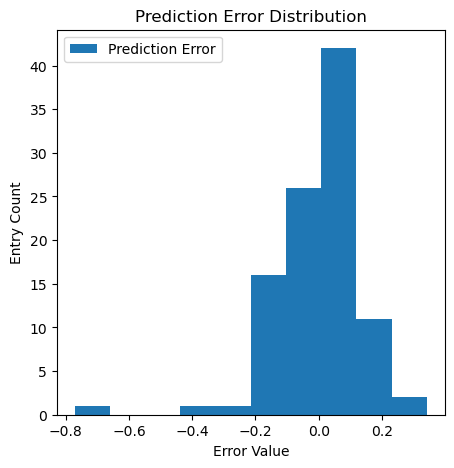

In [32]:
# plot histogram of errors

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.hist(np.log(Y) - Y_pred, label='Prediction Error')
plt.xlabel('Error Value')
plt.ylabel('Entry Count')
plt.title('Prediction Error Distribution')
plt.legend()
plt.show()
# verify that the distribution of erros follows a normal distribution

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Now that we have a prediction model, it's time to test the model against test data to confirm its accuracy on new data. It can be observed that the test dataset comprises the same number of rows and columns as the training dataset, but they are apparently a different group of observations from the same source, Ames Housing Dataset.

After pre-log-transforming the *SalePrice* data of the test data, the R-squared results 0.84. It is slightly lower than the 0.88 of the trained model, but the scatter plot shows good linearity. 

In [33]:
# import the test data

test = pd.read_csv('jtest.csv')
print(test.shape)
test.head()

(100, 82)


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


In [34]:
# assign the set of 15 columns applied to the training model to x-variables and SalePrice column to y-variable

x = test[cols].drop('SalePrice', axis=1).interpolate() # repair missing data in test dataset
y = test['SalePrice']
x

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea,TotRmsAbvGrd,1stFlrSF,YearRemodAdd,LotArea,Fireplaces,WoodDeckSF
0,6,1610,480,2,1977,1610,1977.0,2,28.0,6,1610,2001,10603,2,168
1,6,1732,476,2,1985,741,1985.0,2,336.0,7,977,1985,9206,1,192
2,5,1535,410,2,1979,0,1979.0,2,0.0,8,1535,1979,7018,0,0
3,7,1226,740,3,2009,1226,2009.0,2,0.0,6,1226,2009,10402,0,0
4,7,1818,240,1,1931,1040,1951.0,1,600.0,7,1226,1950,7758,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,1456,440,2,1976,855,1976.0,2,0.0,7,855,1976,2280,1,87
96,7,1726,786,3,2007,1726,2007.0,2,205.0,8,1726,2007,9416,1,171
97,8,3112,795,2,1918,1360,1918.0,2,0.0,8,1360,1990,25419,1,0
98,6,2229,0,0,1912,755,1961.0,1,0.0,8,929,1950,5520,0,0


In [35]:
# test how good the model is with test dataset

# fit the model with log-transformed y-variable of testing dataset in the same way that the training data was transformed
y_pred = model.predict(x)
r2 = model.score(x,np.log(y))
print(f'Test R^2 = {r2}')
# R-squared score 0.84 is slightly lowered compared to the training model's 0.88

Test R^2 = 0.8382396071005003


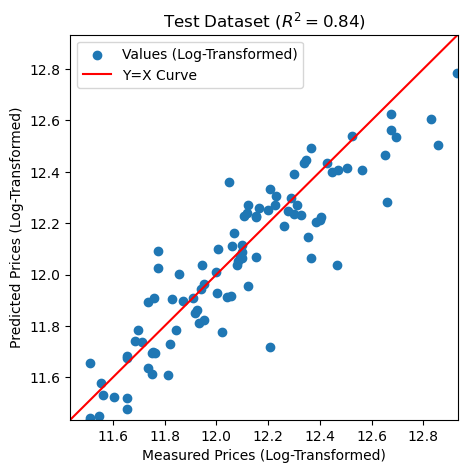

In [36]:
# plot the model against test dataset

plt.figure(figsize=(5,5))
plt.scatter(np.log(y), y_pred, label='Values (Log-Transformed)')
plt.plot([np.log(y).min(), np.log(y).max()], [np.log(y).min(), np.log(y).max()], label='Y=X Curve', c='red', lw=1.5)
plt.axis([y_pred.min(), y_pred.max(), y_pred.min(), y_pred.max()])
plt.title(f'Test Dataset ($R^2 = {r2:.2f}$)')
plt.xlabel('Measured Prices (Log-Transformed)')
plt.ylabel('Predicted Prices (Log-Transformed)')
plt.legend()
plt.show()

[Back to top](#Index)

## Conclusion

It can be confirmed that using the highest 15 correlated independent variables and the log-transformed dependent variable for prediction resulted the best model, and the hypothesis derived from data exploration and model analysis that "given the logarithm of the predicted sales price, the actual sales price can be well predicted by logarithmic transformation" is established and reasonable. Using the linear regression machine learning model built in this project, we were able to predict home sales prices in Ames with 84% accuracy. This will enable potential buyers and sellers to make effective decisions.

[Back to top](#Index)

## References

- Keough, Caroline; Trinh, Tam; Gomez, Joaquin; O'Brien, Michael. “Using Data to Predict Ames, Iowa Home Sale Prices.” NYC Data Science Academy. NYC Data Science Academy, 2022-07-13. 2023-10-23. https://nycdatascience.com/blog/student-works/machine-learning/using-data-to-predict-ames-iowa-home-sale-prices/ .